In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras.callbacks import EarlyStopping, CSVLogger, LearningRateScheduler, ModelCheckpoint
from keras.layers import Dense, Flatten, Input, Dropout, BatchNormalization
from keras.models import load_model, Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
path='/content/drive/MyDrive/캡스톤디자인I/EEG_DATA_Shuffle_250.csv'
dataDF = pd.read_csv(path)
dataDF = dataDF[dataDF.iloc[:, -1] != 2]
dataDF = dataDF.drop('Unnamed: 0', axis=1)
dataDF

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
1,2.0749,10.4531,15.0722,-26.6312,-0.4459,14.5893,9.2869,-2.1056,-43.6692,-17.2096,...,-6.9518,-11.4253,-1.2506,-17.1243,-7.5738,-10.9374,-19.9238,3.2310,-5.6850,4.0
2,-120.1452,-125.0708,-105.8275,-82.4281,-56.1819,-83.7586,-50.9381,-60.4048,-104.6791,-12.6753,...,39.6871,13.5448,1.8542,-12.6098,11.4994,56.9190,30.9258,-34.2025,-78.3047,1.0
4,35.6536,-83.0672,-44.6247,3.7736,20.8569,-24.2469,-17.3361,-5.7469,-192.2175,2.3067,...,-15.2010,-16.8067,-18.4863,-80.4228,-19.3244,-7.9266,-43.2864,-61.6544,13.0952,3.0
5,-26.4502,-21.9386,-46.7953,-48.6652,-44.3203,-26.7433,-73.5531,-16.4969,4.5228,-79.2132,...,-8.1836,-28.3711,-17.8248,-16.4233,-27.1494,22.0284,-31.3985,-22.5446,-51.1506,3.0
6,-8.5712,2.7809,-8.1863,8.7974,-1.8204,6.3870,13.0882,9.3083,-5.0137,0.2405,...,-8.9539,4.6728,2.5838,-15.1619,-5.7835,-12.8411,-15.9941,-19.0685,-4.5740,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6745,-28.2575,-106.5982,-105.8352,-72.8826,-88.6384,-92.5541,-74.6140,-89.4562,-105.2706,-80.6663,...,58.3380,40.3445,50.6423,18.7900,43.2978,47.3521,46.0438,25.8006,15.9784,1.0
6746,12.5703,16.2587,4.2358,2.2900,13.8343,35.1322,-1.6182,28.5269,30.2127,22.9106,...,-10.1217,-9.1032,-16.0911,25.0062,-15.2981,12.9794,-9.7452,-23.9283,16.0098,0.0
6747,0.5186,-1.0535,-6.0790,-10.3947,0.2448,-4.7878,-7.3024,-4.1047,0.4662,-21.1185,...,-1.9083,-3.2804,-10.8001,3.1993,-1.0909,2.0461,-4.2566,-5.6826,1.8557,1.0
6748,0.2283,-1.8268,-12.0759,-18.3676,-29.0130,-20.0806,-17.7438,3.2121,-501.1243,-0.3293,...,38.4397,22.8073,27.0815,28.5507,25.7492,33.6134,34.0079,20.9875,75.9371,3.0


In [4]:
dataDF.replace({3: 2}, inplace=True)
dataDF.replace({4: 3}, inplace=True)

In [5]:
mapping_dict = {idx: i for i, idx in enumerate(dataDF.index[:5401])}

dataDF.index = dataDF.index.map(mapping_dict)

In [6]:
dataDF

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,2.0749,10.4531,15.0722,-26.6312,-0.4459,14.5893,9.2869,-2.1056,-43.6692,-17.2096,...,-6.9518,-11.4253,-1.2506,-17.1243,-7.5738,-10.9374,-19.9238,3.2310,-5.6850,3.0
1,-120.1452,-125.0708,-105.8275,-82.4281,-56.1819,-83.7586,-50.9381,-60.4048,-104.6791,-12.6753,...,39.6871,13.5448,1.8542,-12.6098,11.4994,56.9190,30.9258,-34.2025,-78.3047,1.0
2,35.6536,-83.0672,-44.6247,3.7736,20.8569,-24.2469,-17.3361,-5.7469,-192.2175,2.3067,...,-15.2010,-16.8067,-18.4863,-80.4228,-19.3244,-7.9266,-43.2864,-61.6544,13.0952,2.0
3,-26.4502,-21.9386,-46.7953,-48.6652,-44.3203,-26.7433,-73.5531,-16.4969,4.5228,-79.2132,...,-8.1836,-28.3711,-17.8248,-16.4233,-27.1494,22.0284,-31.3985,-22.5446,-51.1506,2.0
4,-8.5712,2.7809,-8.1863,8.7974,-1.8204,6.3870,13.0882,9.3083,-5.0137,0.2405,...,-8.9539,4.6728,2.5838,-15.1619,-5.7835,-12.8411,-15.9941,-19.0685,-4.5740,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,-28.2575,-106.5982,-105.8352,-72.8826,-88.6384,-92.5541,-74.6140,-89.4562,-105.2706,-80.6663,...,58.3380,40.3445,50.6423,18.7900,43.2978,47.3521,46.0438,25.8006,15.9784,1.0
5396,12.5703,16.2587,4.2358,2.2900,13.8343,35.1322,-1.6182,28.5269,30.2127,22.9106,...,-10.1217,-9.1032,-16.0911,25.0062,-15.2981,12.9794,-9.7452,-23.9283,16.0098,0.0
5397,0.5186,-1.0535,-6.0790,-10.3947,0.2448,-4.7878,-7.3024,-4.1047,0.4662,-21.1185,...,-1.9083,-3.2804,-10.8001,3.1993,-1.0909,2.0461,-4.2566,-5.6826,1.8557,1.0
5398,0.2283,-1.8268,-12.0759,-18.3676,-29.0130,-20.0806,-17.7438,3.2121,-501.1243,-0.3293,...,38.4397,22.8073,27.0815,28.5507,25.7492,33.6134,34.0079,20.9875,75.9371,2.0


In [7]:
ct = 250

x_data = []
y_data = []

print(len(dataDF))

for i in range(len(dataDF)):
    print(i)
    x_data.append([])
    x = 0
    y = 20
    one_row_data = dataDF.iloc[i]
    y_data.append(one_row_data[y - 1])
    for j in range(ct):
        x_data[i].append([one_row_data[x:y - 1]])
        x += 20
        y += 20

x_data = np.array(x_data).reshape(len(x_data), ct, 19)
y_data = np.array(pd.get_dummies(y_data))

x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size=0.2, random_state=2024)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=2024)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640


In [8]:
print("Training set shapes:")
print(x_train.shape)
print(y_train.shape)
print("-------------------")
print("Validation set shapes:")
print(x_val.shape)
print(y_val.shape)
print("-------------------")
print("Test set shapes:")
print(x_test.shape)
print(y_test.shape)

Training set shapes:
(4320, 250, 19)
(4320, 4)
-------------------
Validation set shapes:
(540, 250, 19)
(540, 4)
-------------------
Test set shapes:
(540, 250, 19)
(540, 4)


In [9]:
# 트랜스포머 Block 1개
def transformer_block(input):
  x = keras.layers.MultiHeadAttention(num_heads=16, key_dim=1, dropout=0.1)(input, input, return_attention_scores=False)
  x = x + input
  x = keras.layers.LayerNormalization()(x)
  x2 = keras.layers.Dense(19,activation='relu')(x)
  x2 = x + x2
  x3 = keras.layers.LayerNormalization()(x2)
  return x3

In [10]:
# 위의 transformer_block()을 사용해서 모델을 만드는 함수
def build_model(num_block):
  inputs = keras.Input((ct,19))
  x = inputs
  for _ in range(num_block):
    x = transformer_block(x)
  x = keras.layers.GlobalAveragePooling1D()(x)
  output = keras.layers.Dense(4,activation='softmax')(x)
  return keras.Model(inputs,output)

In [11]:
num_block = 6
myMdl = build_model(num_block)
myMdl.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 250, 19)]            0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 250, 19)              1283      ['input_1[0][0]',             
 iHeadAttention)                                                     'input_1[0][0]']             
                                                                                                  
 tf.__operators__.add (TFOp  (None, 250, 19)              0         ['multi_head_attention[0][0]',
 Lambda)                                                             'input_1[0][0]']             
                                                                                              

In [12]:
#에포크마다 모델을 저장하고 loss를 기록한 csv 저장을 위한 코드
root = '/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/'
folder_name = '20240415_4modelsave'
os.mkdir(root+folder_name)
csv_logger = CSVLogger(root+folder_name+'/training.csv', separator=",", append=True)
mcp_save_best = tf.keras.callbacks.ModelCheckpoint(
    root+folder_name+'/{epoch:02d}-{val_loss:.5f}_best', save_best_only=True,
    monitor='val_loss', verbose=1, mode='min')
mcp_save = tf.keras.callbacks.ModelCheckpoint(
    root+folder_name+'/{epoch:02d}-{val_loss:.5f}', save_best_only=False,
    monitor='val_loss', verbose=1, mode='min')

In [13]:
adam = Adam(learning_rate=0.001)
#옵티마이저를 Adam 알고리즘을 사용합니다. 학습률을 0.001로 설정(학습률은 가중치를 얼마나 업데이트할지 이를 조정하여 모델의 성능을 조정)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc_loss = ModelCheckpoint('/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_loss_v6.h5', monitor='val_loss', verbose=1, save_best_only=True)
#훈련중 손실값을 모니터링하여 조기 종료하는 콜백 함수
mc = ModelCheckpoint('/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_acc_v6.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
#모델의 검증 정확도를 확인하여 가장 좋은 시점의 모델을 저장함.
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
#학습률을 조정하는 콜백 함수
myMdl.compile(optimizer=adam, loss=['categorical_crossentropy'], metrics=['accuracy'])
#모델의 옵티마이저를 설정, 손실함수, 정확도를 출력
trans_h = myMdl.fit(x_train, y_train,
                   batch_size=32,
                   validation_data=(x_val, y_val),
                   epochs=200,
                   callbacks=[es, mc, mc_loss,mcp_save_best,mcp_save, lr_schedule, csv_logger])

Epoch 1/200
135/135 [==============================] - ETA: 0s - loss: 1.1299 - accuracy: 0.5329
Epoch 1: val_accuracy improved from -inf to 0.72037, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_acc_v6.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: val_loss improved from inf to 0.83487, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_loss_v6.h5

Epoch 1: val_loss improved from inf to 0.83487, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/01-0.83487_best

Epoch 1: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/01-0.83487
135/135 [==============================] - 48s 248ms/step - loss: 1.1299 - accuracy: 0.5329 - val_loss: 0.8349 - val_accuracy: 0.7204 - lr: 0.0010
Epoch 2/200
135/135 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.7611
Epoch 2: val_accuracy improved from 0.72037 to 0.81852, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_acc_v6.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.83487 to 0.54085, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_loss_v6.h5

Epoch 2: val_loss improved from 0.83487 to 0.54085, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/02-0.54085_best

Epoch 2: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/02-0.54085
135/135 [==============================] - 33s 243ms/step - loss: 0.6774 - accuracy: 0.7611 - val_loss: 0.5409 - val_accuracy: 0.8185 - lr: 9.0484e-04
Epoch 3/200
135/135 [==============================] - ETA: 0s - loss: 0.4424 - accuracy: 0.8426
Epoch 3: val_accuracy improved from 0.81852 to 0.85741, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_acc_v6.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss improved from 0.54085 to 0.41249, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_loss_v6.h5

Epoch 3: val_loss improved from 0.54085 to 0.41249, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/03-0.41249_best

Epoch 3: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/03-0.41249
135/135 [==============================] - 33s 243ms/step - loss: 0.4424 - accuracy: 0.8426 - val_loss: 0.4125 - val_accuracy: 0.8574 - lr: 8.1873e-04
Epoch 4/200
134/135 [============================>.] - ETA: 0s - loss: 0.3255 - accuracy: 0.8787
Epoch 4: val_accuracy improved from 0.85741 to 0.88148, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_acc_v6.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_loss improved from 0.41249 to 0.32756, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_loss_v6.h5

Epoch 4: val_loss improved from 0.41249 to 0.32756, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/04-0.32756_best

Epoch 4: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/04-0.32756
135/135 [==============================] - 33s 243ms/step - loss: 0.3258 - accuracy: 0.8792 - val_loss: 0.3276 - val_accuracy: 0.8815 - lr: 7.4082e-04
Epoch 5/200
135/135 [==============================] - ETA: 0s - loss: 0.2629 - accuracy: 0.9086
Epoch 5: val_accuracy improved from 0.88148 to 0.90926, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_acc_v6.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_loss improved from 0.32756 to 0.27208, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_loss_v6.h5

Epoch 5: val_loss improved from 0.32756 to 0.27208, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/05-0.27208_best

Epoch 5: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/05-0.27208
135/135 [==============================] - 33s 245ms/step - loss: 0.2629 - accuracy: 0.9086 - val_loss: 0.2721 - val_accuracy: 0.9093 - lr: 6.7032e-04
Epoch 6/200
135/135 [==============================] - ETA: 0s - loss: 0.2195 - accuracy: 0.9220
Epoch 6: val_accuracy improved from 0.90926 to 0.91296, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_acc_v6.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 6: val_loss improved from 0.27208 to 0.26212, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_loss_v6.h5

Epoch 6: val_loss improved from 0.27208 to 0.26212, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/06-0.26212_best

Epoch 6: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/06-0.26212
135/135 [==============================] - 33s 244ms/step - loss: 0.2195 - accuracy: 0.9220 - val_loss: 0.2621 - val_accuracy: 0.9130 - lr: 6.0653e-04
Epoch 7/200
135/135 [==============================] - ETA: 0s - loss: 0.1784 - accuracy: 0.9400
Epoch 7: val_accuracy did not improve from 0.91296

Epoch 7: val_loss improved from 0.26212 to 0.24678, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_loss_v6.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 7: val_loss improved from 0.26212 to 0.24678, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/07-0.24678_best

Epoch 7: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/07-0.24678
135/135 [==============================] - 32s 237ms/step - loss: 0.1784 - accuracy: 0.9400 - val_loss: 0.2468 - val_accuracy: 0.9130 - lr: 5.4881e-04
Epoch 8/200
135/135 [==============================] - ETA: 0s - loss: 0.1545 - accuracy: 0.9491
Epoch 8: val_accuracy improved from 0.91296 to 0.92407, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_acc_v6.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 8: val_loss improved from 0.24678 to 0.24628, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_loss_v6.h5

Epoch 8: val_loss improved from 0.24678 to 0.24628, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/08-0.24628_best

Epoch 8: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/08-0.24628
135/135 [==============================] - 32s 241ms/step - loss: 0.1545 - accuracy: 0.9491 - val_loss: 0.2463 - val_accuracy: 0.9241 - lr: 4.9659e-04
Epoch 9/200
135/135 [==============================] - ETA: 0s - loss: 0.1346 - accuracy: 0.9556
Epoch 9: val_accuracy did not improve from 0.92407

Epoch 9: val_loss improved from 0.24628 to 0.23801, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_loss_v6.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 9: val_loss improved from 0.24628 to 0.23801, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/09-0.23801_best

Epoch 9: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/09-0.23801
135/135 [==============================] - 33s 242ms/step - loss: 0.1346 - accuracy: 0.9556 - val_loss: 0.2380 - val_accuracy: 0.9241 - lr: 4.4933e-04
Epoch 10/200
135/135 [==============================] - ETA: 0s - loss: 0.1131 - accuracy: 0.9632
Epoch 10: val_accuracy did not improve from 0.92407

Epoch 10: val_loss improved from 0.23801 to 0.23541, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_loss_v6.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 10: val_loss improved from 0.23801 to 0.23541, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/10-0.23541_best

Epoch 10: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/10-0.23541
135/135 [==============================] - 32s 240ms/step - loss: 0.1131 - accuracy: 0.9632 - val_loss: 0.2354 - val_accuracy: 0.9241 - lr: 4.0657e-04
Epoch 11/200
135/135 [==============================] - ETA: 0s - loss: 0.0983 - accuracy: 0.9713
Epoch 11: val_accuracy improved from 0.92407 to 0.92593, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_acc_v6.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 11: val_loss improved from 0.23541 to 0.22122, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_loss_v6.h5

Epoch 11: val_loss improved from 0.23541 to 0.22122, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/11-0.22122_best

Epoch 11: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/11-0.22122
135/135 [==============================] - 32s 241ms/step - loss: 0.0983 - accuracy: 0.9713 - val_loss: 0.2212 - val_accuracy: 0.9259 - lr: 3.6788e-04
Epoch 12/200
135/135 [==============================] - ETA: 0s - loss: 0.0849 - accuracy: 0.9745
Epoch 12: val_accuracy improved from 0.92593 to 0.93148, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_acc_v6.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 12: val_loss improved from 0.22122 to 0.21633, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_loss_v6.h5

Epoch 12: val_loss improved from 0.22122 to 0.21633, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/12-0.21633_best

Epoch 12: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/12-0.21633
135/135 [==============================] - 33s 243ms/step - loss: 0.0849 - accuracy: 0.9745 - val_loss: 0.2163 - val_accuracy: 0.9315 - lr: 3.3287e-04
Epoch 13/200
135/135 [==============================] - ETA: 0s - loss: 0.0756 - accuracy: 0.9789
Epoch 13: val_accuracy improved from 0.93148 to 0.93889, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_acc_v6.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 13: val_loss improved from 0.21633 to 0.21346, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_loss_v6.h5

Epoch 13: val_loss improved from 0.21633 to 0.21346, saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/13-0.21346_best

Epoch 13: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/13-0.21346
135/135 [==============================] - 33s 242ms/step - loss: 0.0756 - accuracy: 0.9789 - val_loss: 0.2135 - val_accuracy: 0.9389 - lr: 3.0119e-04
Epoch 14/200
135/135 [==============================] - ETA: 0s - loss: 0.0660 - accuracy: 0.9806
Epoch 14: val_accuracy did not improve from 0.93889

Epoch 14: val_loss did not improve from 0.21346

Epoch 14: val_loss did not improve from 0.21346

Epoch 14: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/14-0.22321
135/135 [==============================] - 25s 183ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 19: val_loss did not improve from 0.21346

Epoch 19: val_loss did not improve from 0.21346

Epoch 19: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/19-0.23374
135/135 [==============================] - 25s 188ms/step - loss: 0.0403 - accuracy: 0.9903 - val_loss: 0.2337 - val_accuracy: 0.9407 - lr: 1.6530e-04
Epoch 20/200
135/135 [==============================] - ETA: 0s - loss: 0.0349 - accuracy: 0.9944
Epoch 20: val_accuracy did not improve from 0.94074

Epoch 20: val_loss did not improve from 0.21346

Epoch 20: val_loss did not improve from 0.21346

Epoch 20: saving model to /content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/20-0.23879
135/135 [==============================] - 25s 188ms/step - loss: 0.0349 - accuracy: 0.9944 - val_loss: 0.2388 - val_accuracy: 0.9389 - lr: 1.4957e-04
Epoch 21/200
135/135 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9944
Epoch 21: val_accuracy did

In [14]:
transformer_best = load_model('/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_acc_v6.h5')
transformer_accuracy = transformer_best.evaluate(x_test, y_test, verbose=1)[1]   #테스터 데이터를 사용해 모델 정확도 평가
print("Test Acc. Transformer: {:.3f}%".format(transformer_accuracy * 100))

transformer_best_loss = load_model('/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/best_transformer_loss_v6.h5')
transformer_loss = transformer_best_loss.evaluate(x_test, y_test, verbose=1)[0]   #테스터 데이터를 사용해 모델의 손실 평가
print("Test val_Loss. transformer:{:.3f}".format(transformer_loss))

y_pred = np.array(list(map(lambda x: np.argmax(x), transformer_best.predict(x_test))))   #테스트 데이터에 대한 예측 수행 및 confusion matrix 출력하여 성능 평가
y_test = y_test.argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits=4)) #digits=4로 소수점 지정

17/17 [==============================] - 2s 46ms/step - loss: 0.2681 - accuracy: 0.9148
Test Acc. Transformer: 91.481%
17/17 [==============================] - 1s 46ms/step - loss: 0.2498 - accuracy: 0.9037
Test val_Loss. transformer:0.250
17/17 [==============================] - 1s 42ms/step
              precision    recall  f1-score   support

           0     0.9516    0.9077    0.9291       130
           1     0.9225    0.9704    0.9458       135
           2     0.9242    0.9242    0.9242       132
           3     0.8662    0.8601    0.8632       143

    accuracy                         0.9148       540
   macro avg     0.9161    0.9156    0.9156       540
weighted avg     0.9150    0.9148    0.9146       540



In [15]:
myMdl = tf.keras.models.load_model('/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/13-0.21346_best')

In [16]:
history = pd.read_csv('/content/drive/MyDrive/캡스톤디자인I/Real_Save_Model/20240415_4modelsave/training.csv')

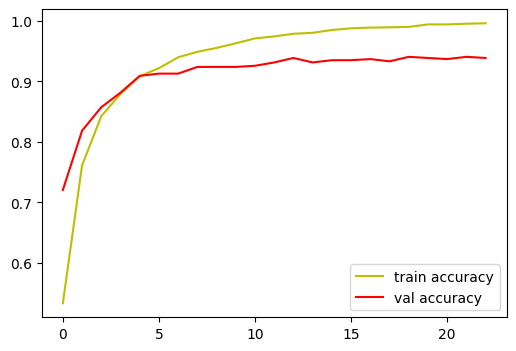

In [17]:
# accuracy curve
plt.figure(figsize=(6, 4))
plt.plot(trans_h.history['accuracy'], 'y', label='train accuracy')
plt.plot(trans_h.history['val_accuracy'], 'r', label='val accuracy')
plt.legend()
plt.show()

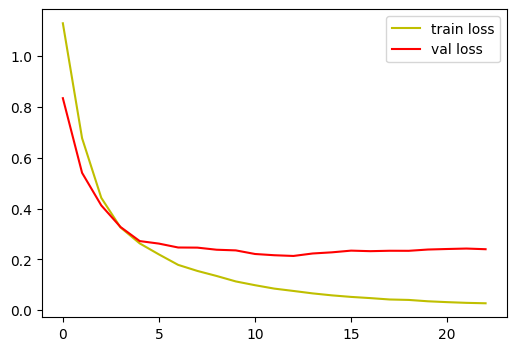

In [18]:
#loss curve
plt.figure(figsize=(6,4))
plt.plot(trans_h.history['loss'][:], 'y', label='train loss')
plt.plot(trans_h.history['val_loss'][:], 'r', label='val loss')
plt.legend()
plt.show()

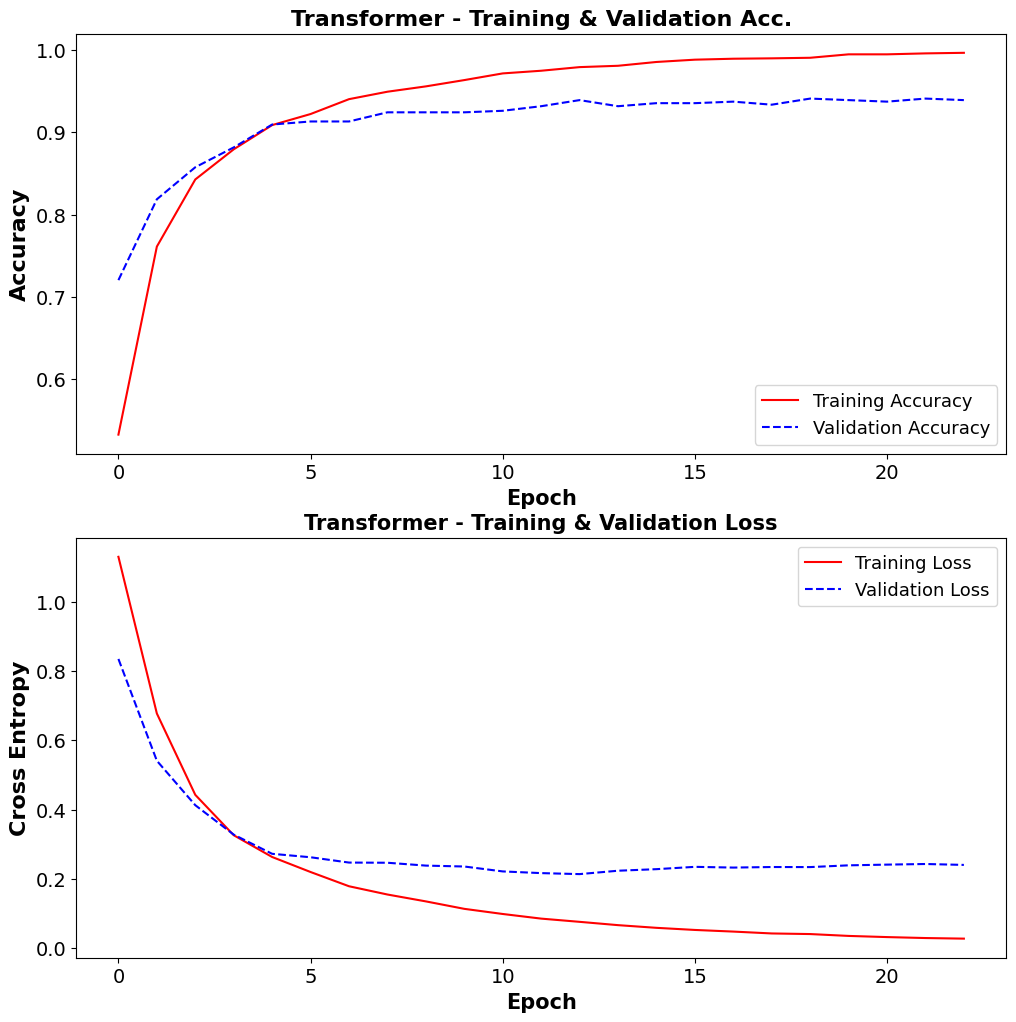

In [19]:
acc = trans_h.history['accuracy']
val_acc = trans_h.history['val_accuracy']
loss = trans_h.history['loss']
val_loss = trans_h.history['val_loss']
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b', linestyle='--') # Modify linestyle for validation accuracy
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('Transformer - Training & Validation Acc.', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b', linestyle='--') # Modify linestyle for validation loss
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('Transformer - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.show()